In [80]:
# pip install scikit-surprise
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import gc

In [55]:
df1 = pd.read_csv(('data/merge.csv'))
df_title = pd.read_csv('data/df_title.csv')

In [49]:
reader = Reader()
N_filas = 100000 # Limitamos el dataset a N_filas
data = Dataset.load_from_df(df1[['userId', 'movieId', 'score']][:N_filas], reader)

In [50]:
# Separamos nuestros datos, modelo SVD, 
trainset, testset = train_test_split(data, test_size=.25)
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
# df_title = pd.read_csv('data/df_title.csv')
# df_title = df_title[['movieId','title']]
# df_title

In [52]:
# Tomaremos un usuario para hacerle una recomendación
usuario = 124380
rating = 4.5   # Tomamos películas a las que haya calificado con 4 o 5 estrellas
df_user = df1[(df1['userId'] == usuario) & (df1['score'] >= rating)] # Filtra por usuario y score > rating
df_user = df_user.reset_index(drop=True) # Resetea el index
# df_user = df_user.drop('Unnamed: 0', axis=1)
df_user

,userId,movieId,score,platform,title
0,124380,as9383,4.5,a,held up
1,124380,as1126,5.0,a,rudy ruettiger: the walk on
2,124380,ns4663,5.0,n,monkey twins
3,124380,as5724,5.0,a,devil's island
4,124380,as3030,5.0,a,blood & treasure
5,124380,as7245,5.0,a,anna karenina - vronsky's story
6,124380,as8146,4.5,a,cold enough for snow
7,124380,ns604,4.5,n,the karate kid part iii
8,124380,hs2554,5.0,h,abc news specials
9,124380,as7397,5.0,a,let's enjoy kenya safari like a popular online...


In [56]:
df_title.iloc[:4499].copy()

,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
4494,as4495,copper mountain
4495,as4496,color crew all about colors
4496,as4497,anu menon: wonder menon
4497,as4498,a date with murder


In [57]:
recomendaciones_usuario = df_title.iloc[:4499].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 2)


,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker


In [66]:
# Debemos extraer las películas que ya ha visto
usuario_vistas = df1[df1['userId'] == usuario] # Filtro por peliculas que el usuario califico
print(usuario_vistas.shape)
# usuario_vistas = usuario_vistas.drop('Unnamed: 0', axis=1)
usuario_vistas['movieId'].values

(34, 5)


array(['as9383', 'as1126', 'ns7777', 'hs1378', 'ns4663', 'ns6217',
       'hs1558', 'ns518', 'as1867', 'as4403', 'as2612', 'ns6534',
       'as5724', 'ns4842', 'as3030', 'as7245', 'as8146', 'ns604',
       'hs2554', 'as7397', 'hs1743', 'as9619', 'as792', 'ns6444',
       'as5370', 'ns4122', 'as5018', 'ns3454', 'ns6233', 'ns5272',
       'ns5492', 'hs305', 'ns7881', 'as883'], dtype=object)

In [70]:
recomendaciones_usuario.drop(usuario_vistas.movieId, inplace = True,  errors='ignore')
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario

,level_0,index,movieId,title
0,0,0,as1,the grand seduction
1,1,1,as2,take care good night
2,2,2,as3,secrets of deception
3,3,3,as4,pink: staying true
4,4,4,as5,monster maker
...,...,...,...,...
4494,4494,4494,as4495,copper mountain
4495,4495,4495,as4496,color crew all about colors
4496,4496,4496,as4497,anu menon: wonder menon
4497,4497,4497,as4498,a date with murder


In [73]:
# Recomendamos
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['movieId'].apply(lambda x: model.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,level_0,index,movieId,title,Estimate_Score
2904,2904,2904,as2905,carriers,3.964890
118,118,118,as119,where is chicky? - chapter two,3.960435
1069,1069,1069,as1070,secret life of the hospital bed,3.922007
4101,4101,4101,as4102,yuvarathnaa (kannada),3.909258
396,396,396,as397,the who - sensation the story of tommy,3.906165
4156,4156,4156,as4157,darra,3.903938
3423,3423,3423,as3424,a fine step,3.900202
4083,4083,4083,as4084,animal songs by little baby bum,3.886010
3429,3429,3429,as3430,a dangerous man,3.880926
1126,1126,1126,as1127,rubbadubbers,3.880006


In [74]:
# Evaluamos
accuracy.rmse(predictions)

RMSE: 0.9556


0.9555554021685576

In [76]:
# Optimizacion de hiperparametros
# Realiza una validación cruzada con diferentes valores de un hiperparámetro (número de factores latentes) en un modelo SVD. 
# El objetivo es encontrar el valor de este hiperparámetro que da lugar al menor valor medio de RMSE para un conjunto de datos dado.
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9501  0.9483  0.9500  0.9495  0.0008  
Fit time          0.59    0.56    0.74    0.63    0.08    
Test time         0.29    0.40    0.32    0.33    0.05    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9443  0.9490  0.9527  0.9486  0.0034  
Fit time          0.66    0.72    0.77    0.72    0.05    
Test time         0.28    0.40    0.57    0.42    0.12    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9497  0.9466  0.9505  0.9490  0.0017  
Fit time          1.04    1.03    0.74    0.94    0.14    
Test time         0.49    0.52    0.43    0.48    0.04    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9492  0.9

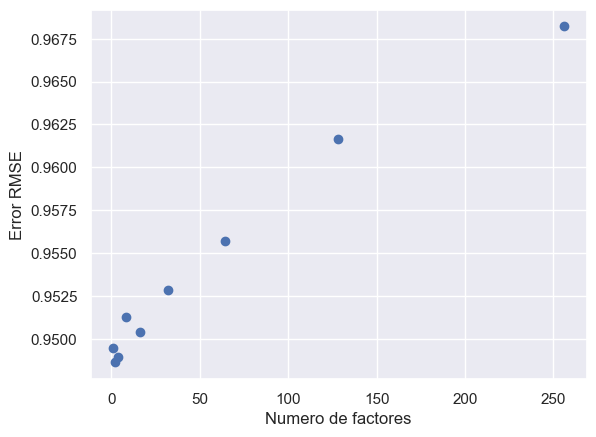

In [81]:
# Ploteamos desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [82]:
# Nuevamente, no apto para ansiosos
# Este código utiliza la función GridSearchCV de la biblioteca surprise para realizar la sintonización de hiperparámetros del modelo SVD.
# param_grid contiene valores para hiperparámetros como el número de factores latentes, número de épocas, tasa de aprendizaje y regularización.
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
# GridSearchCV realiza una búsqueda en cuadrícula sobre todas las posibles combinaciones de hiperparámetros y 
# evalúa el rendimiento del modelo utilizando validación cruzada. 
# En este caso, la métrica de evaluación utilizada es el RMSE, y el parámetro cv especifica el número de pliegues de validación cruzada.
# Al establecer n_jobs en -1, utiliza todos los núcleos de CPU disponibles para acelerar el proceso de optimización de hiperparámetros.
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [83]:
# Observamos performance del mejor modelo

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9438465739483798
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.002}


In [ ]:
# Incorporacion de nuevos datos
def load_data(name):
    df = pd.read_csv(name, header = None, names = ['userId','score'], usecols = [0,1])
    
    # En ciertos casos, forzar un tipo de dato hace que se ahorre mucho lugar en memoria.
    df['score'] = df['score']#.astype(float) 
    return df


# df2 = load_data() Aqui se cargan los datos nuevos
# print(df2.shape)

In [ ]:
movies_ids_df2 = df2.userId[df2.score.isna()].values
print(movies_ids_df2)
print(len(movies_ids_df2))

movies_ids_df2 = np.arange(4500,len(movies_ids_df2) + 4500)
print(movies_ids_df2)

In [ ]:
df2_nan = pd.DataFrame(pd.isnull(df2.score))
df2_nan = df2_nan[df2_nan['score'] == True]
idx_movies_ids = df2_nan.index.values
print(idx_movies_ids)

In [ ]:
# Agregamos el índice de la última instancia del DataFrame
idx_movies_ids = np.append(idx_movies_ids,df2.shape[0])

In [ ]:
cantidad_criticas = np.diff(idx_movies_ids)
cantidad_criticas

In [ ]:
columna_movie_id = np.array([])
for i in range(cantidad_criticas.size):
    aux = np.full(cantidad_criticas[i], movies_ids_df2[i])
    columna_movie_id = np.concatenate((columna_movie_id, aux))

In [ ]:
df2['movieId'] = columna_movie_id
del columna_movie_id

df2.dropna(inplace = True)
df2['userId'] = df2['userId'].astype(int)
df2['movieId'] = df2['movieId'].astype(np.int16)
df2['score'] = df2['score'].astype(np.int8)

gc.collect()

In [ ]:
### 5.
df = df1.copy()
del df1
df = df.append(df2)
print(df.shape)

In [ ]:
# Corroboramos que estén todas las películas

peliculas_presentes = df.movie_id.unique()
peliculas_presentes

In [ ]:
print((peliculas_presentes - np.arange(1,9210 + 1)).sum())

In [ ]:
# Y asi sucesivamente
switch = False
if switch:
    df.to_csv('../Datasets/Clase_08_RS/combined_data_1y2_con_movie_id.csv', index= False)